In [3]:
import spotipy ##Spotipy is a lightweight Python library for the Spotify Web API.
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from spotipy.oauth2 import SpotifyClientCredentials   #Authorization

cid ="4f80fc85ecd14c46a479a6fbd8191a16" ##credentials
secret = "d391e5c1506942faa0dd354bae72541e" ##password

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [4]:
results = sp.search(q='drake', limit=20)    #songs by Drake on spotify
for i, t in enumerate(results['tracks']['items']):
    print('', i, t['name'])

 0 Money In The Grave (Drake ft. Rick Ross)
 1 No Guidance (feat. Drake)
 2 Going Bad (feat. Drake)
 3 No Guidance (feat. Drake)
 4 MIA (feat. Drake)
 5 Won't Be Late (feat. Drake)
 6 Look Alive (feat. Drake)
 7 Nonstop
 8 God's Plan
 9 Girls Need Love (with Drake) - Remix
 10 Behind Barz - Bonus
 11 Nice For What
 12 Gold Roses (feat. Drake)
 13 In My Feelings
 14 Yes Indeed
 15 Never Recover (Lil Baby & Gunna, Drake)
 16 Passionfruit
 17 Behind Barz - Bonus
 18 R.I.C.O. (feat. Drake)
 19 Come and See Me (feat. Drake)


In [5]:
# timeit library to measure the time needed to run this code
import timeit
start = timeit.default_timer()

# create empty lists where the results are going to be stored
artist_name = []
track_name = []
popularity = []
track_id = []

for i in range(0,10000,50):
    track_results = sp.search(q='year:2019', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
      

stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)

Time to run this code (in seconds): 65.742803806


In [6]:
print('number of elements in the track_id list:', len(track_id))

number of elements in the track_id list: 10000


In [7]:
import pandas as pd

df_tracks = pd.DataFrame({'artist_name':artist_name,'track_name':track_name,'track_id':track_id,'popularity':popularity})
print(df_tracks.shape)
df_tracks.head()



(10000, 4)


,artist_name,track_name,track_id,popularity
0,Lizzo,Truth Hurts,5qmq61DAAOUaW8AUo8xKhh,94
1,Drake,Money In The Grave (Drake ft. Rick Ross),5ry2OE6R2zPQFDO85XkgRb,93
2,Shawn Mendes,Señorita,0TK2YIli7K1leLovkQiNik,100
3,Lil Nas X,Panini,6fTt0CH2t0mdeB2N9XFG5r,93
4,Post Malone,Circles,21jGcNKet2qwijlDFuPiPb,94


In [8]:
# group the entries by artist_name and track_name and check for duplicates

grouped = df_tracks.groupby(['artist_name','track_name'], as_index=True).size()
grouped[grouped > 1].count()

584

In [9]:
df_tracks.drop_duplicates(subset=['artist_name','track_name'], inplace=True)

In [10]:
df_tracks[df_tracks.duplicated(subset=['artist_name','track_name'],keep=False)].count()

artist_name    0
track_name     0
track_id       0
popularity     0
dtype: int64

In [11]:
df_tracks.shape

(9370, 4)

In [12]:
df_tracks

,artist_name,track_name,track_id,popularity
0,Lizzo,Truth Hurts,5qmq61DAAOUaW8AUo8xKhh,94
1,Drake,Money In The Grave (Drake ft. Rick Ross),5ry2OE6R2zPQFDO85XkgRb,93
2,Shawn Mendes,Señorita,0TK2YIli7K1leLovkQiNik,100
3,Lil Nas X,Panini,6fTt0CH2t0mdeB2N9XFG5r,93
4,Post Malone,Circles,21jGcNKet2qwijlDFuPiPb,94
5,Lil Tecca,Ransom,6EOKwHETwSkZ9gW2b6ASE0,93
6,Billie Eilish,bad guy,2Fxmhks0bxGSBdJ92vM42m,96
7,DaBaby,Suge,2gwkD6igEhQbDQegRCcdoB,88
8,Young Thug,Hot (feat. Gunna),5Z8HZM6iQMhhqyPcCGY5g9,88
9,Lewis Capaldi,Someone You Loved,7qEHsqek33rTcFNT9PFqLf,94


In [13]:
# again measuring the time
start = timeit.default_timer()

# empty list, batchsize and the counter for None results
rows = []
batchsize = 100
None_counter = 0

for i in range(0,len(df_tracks['track_id']),batchsize):
    batch = df_tracks['track_id'][i:i+batchsize]
    feature_results = sp.audio_features(batch)
    for i, t in enumerate(feature_results):
        if t == None:
            None_counter = None_counter + 1
        else:
            rows.append(t)
            
print('Number of tracks where no audio features were available:',None_counter)

stop = timeit.default_timer()
print ('Time to run this code (in seconds):',stop - start)

Number of tracks where no audio features were available: 16
Time to run this code (in seconds): 20.961781499999987


In [14]:
print('number of elements in the track_id list:', len(rows))

number of elements in the track_id list: 9354


In [15]:
df_audio_features = pd.DataFrame.from_dict(rows,orient='columns')
print("Shape of the dataset:", df_audio_features.shape)
df_audio_features.head()

Shape of the dataset: (9354, 18)


,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.110,https://api.spotify.com/v1/audio-analysis/5qmq...,0.715,173325,0.624,5qmq61DAAOUaW8AUo8xKhh,0.00000,4,0.1230,-3.046,0,0.1140,158.087,4,https://api.spotify.com/v1/tracks/5qmq61DAAOUa...,audio_features,spotify:track:5qmq61DAAOUaW8AUo8xKhh,0.412
1,0.101,https://api.spotify.com/v1/audio-analysis/5ry2...,0.831,205427,0.502,5ry2OE6R2zPQFDO85XkgRb,0.00000,10,0.1220,-4.045,0,0.0460,100.541,4,https://api.spotify.com/v1/tracks/5ry2OE6R2zPQ...,audio_features,spotify:track:5ry2OE6R2zPQFDO85XkgRb,0.101
2,0.037,https://api.spotify.com/v1/audio-analysis/0TK2...,0.759,190960,0.540,0TK2YIli7K1leLovkQiNik,0.00000,9,0.0945,-6.039,0,0.0287,116.947,4,https://api.spotify.com/v1/tracks/0TK2YIli7K1l...,audio_features,spotify:track:0TK2YIli7K1leLovkQiNik,0.750
3,0.342,https://api.spotify.com/v1/audio-analysis/6fTt...,0.703,114893,0.594,6fTt0CH2t0mdeB2N9XFG5r,0.00000,5,0.1230,-6.146,0,0.0752,153.848,4,https://api.spotify.com/v1/tracks/6fTt0CH2t0md...,audio_features,spotify:track:6fTt0CH2t0mdeB2N9XFG5r,0.475
4,0.192,https://api.spotify.com/v1/audio-analysis/21jG...,0.695,215280,0.762,21jGcNKet2qwijlDFuPiPb,0.00244,0,0.0863,-3.497,1,0.0395,120.042,4,https://api.spotify.com/v1/tracks/21jGcNKet2qw...,audio_features,spotify:track:21jGcNKet2qwijlDFuPiPb,0.553


In [31]:
df = pd.merge(df_tracks,df_audio_features,on='track_id',how='inner')
print("Shape of the dataset:", df_audio_features.shape)
df.head()

Shape of the dataset: (9354, 15)


,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,type,valence
0,Lizzo,Truth Hurts,5qmq61DAAOUaW8AUo8xKhh,94,0.110,0.715,173325,0.624,0.00000,4,0.1230,-3.046,0,0.1140,158.087,4,audio_features,0.412
1,Drake,Money In The Grave (Drake ft. Rick Ross),5ry2OE6R2zPQFDO85XkgRb,93,0.101,0.831,205427,0.502,0.00000,10,0.1220,-4.045,0,0.0460,100.541,4,audio_features,0.101
2,Shawn Mendes,Señorita,0TK2YIli7K1leLovkQiNik,100,0.037,0.759,190960,0.540,0.00000,9,0.0945,-6.039,0,0.0287,116.947,4,audio_features,0.750
3,Lil Nas X,Panini,6fTt0CH2t0mdeB2N9XFG5r,93,0.342,0.703,114893,0.594,0.00000,5,0.1230,-6.146,0,0.0752,153.848,4,audio_features,0.475
4,Post Malone,Circles,21jGcNKet2qwijlDFuPiPb,94,0.192,0.695,215280,0.762,0.00244,0,0.0863,-3.497,1,0.0395,120.042,4,audio_features,0.553


In [18]:
df[df.duplicated(subset=['artist_name','track_name'],keep=False)]

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,type,valence


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9354 entries, 0 to 9353
Data columns (total 18 columns):
artist_name         9354 non-null object
track_name          9354 non-null object
track_id            9354 non-null object
popularity          9354 non-null int64
acousticness        9354 non-null float64
danceability        9354 non-null float64
duration_ms         9354 non-null int64
energy              9354 non-null float64
instrumentalness    9354 non-null float64
key                 9354 non-null int64
liveness            9354 non-null float64
loudness            9354 non-null float64
mode                9354 non-null int64
speechiness         9354 non-null float64
tempo               9354 non-null float64
time_signature      9354 non-null int64
type                9354 non-null object
valence             9354 non-null float64
dtypes: float64(9), int64(5), object(4)
memory usage: 1.4+ MB


In [34]:
df.sort_values('popularity', ascending = False).head(10) #top10songs2019

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,type,valence
2,Shawn Mendes,Señorita,0TK2YIli7K1leLovkQiNik,100,0.0370,0.759,190960,0.540,0.000000,9,0.0945,-6.039,0,0.0287,116.947,4,audio_features,0.750
43,Anuel AA,China,2ksOAxtIxY8yElEWw8RhgK,97,0.0846,0.786,301714,0.808,0.000289,7,0.0822,-3.702,1,0.0882,105.027,4,audio_features,0.609
58,Tones and I,Dance Monkey,5ZULALImTm80tzUbYQYM9d,96,0.6920,0.824,209438,0.588,0.000104,6,0.1490,-6.400,0,0.0924,98.027,4,audio_features,0.513
6,Billie Eilish,bad guy,2Fxmhks0bxGSBdJ92vM42m,96,0.3280,0.701,194088,0.425,0.130000,7,0.1000,-10.965,1,0.3750,135.128,4,audio_features,0.562
11,Y2K,Lalala,51Fjme0JiitpyXKuyQiCDo,96,0.1810,0.843,160627,0.391,0.000000,2,0.1370,-7.899,1,0.0845,129.972,4,audio_features,0.496
13,Sam Smith,How Do You Sleep?,6b2RcmUt1g9N9mQ3CbjX2Y,96,0.1530,0.477,202205,0.682,0.000000,1,0.0763,-4.931,0,0.0925,110.567,5,audio_features,0.345
44,Bad Bunny,Callaita,2TH65lNHgvLxCKXM3apjxI,95,0.6000,0.610,250534,0.624,0.000002,2,0.2430,-4.773,1,0.3090,176.169,4,audio_features,0.244
0,Lizzo,Truth Hurts,5qmq61DAAOUaW8AUo8xKhh,94,0.1100,0.715,173325,0.624,0.000000,4,0.1230,-3.046,0,0.1140,158.087,4,audio_features,0.412
21,Ed Sheeran,Beautiful People (feat. Khalid),4evmHXcjt3bTUHD1cvny97,94,0.1240,0.640,197867,0.648,0.000000,5,0.0802,-8.113,0,0.1870,92.977,4,audio_features,0.548
4,Post Malone,Circles,21jGcNKet2qwijlDFuPiPb,94,0.1920,0.695,215280,0.762,0.002440,0,0.0863,-3.497,1,0.0395,120.042,4,audio_features,0.553


In [54]:
x = df[['artist_name','track_name']].groupby('artist_name').count().sort_values('track_name', ascending = False)
x.head(10)

,track_name
artist_name,
Ludwig van Beethoven,193
Wolfgang Amadeus Mozart,141
Johann Sebastian Bach,70
Quality Control,55
Beyoncé,45
Steven Universe,41
Drake,38
Chris Brown,33
mxmtoon,30


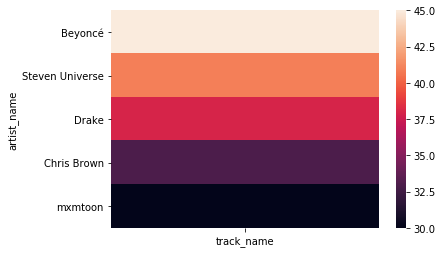

In [71]:
sns.heatmap(x[4:].head(5)) #heatmap of top 5 modern artists

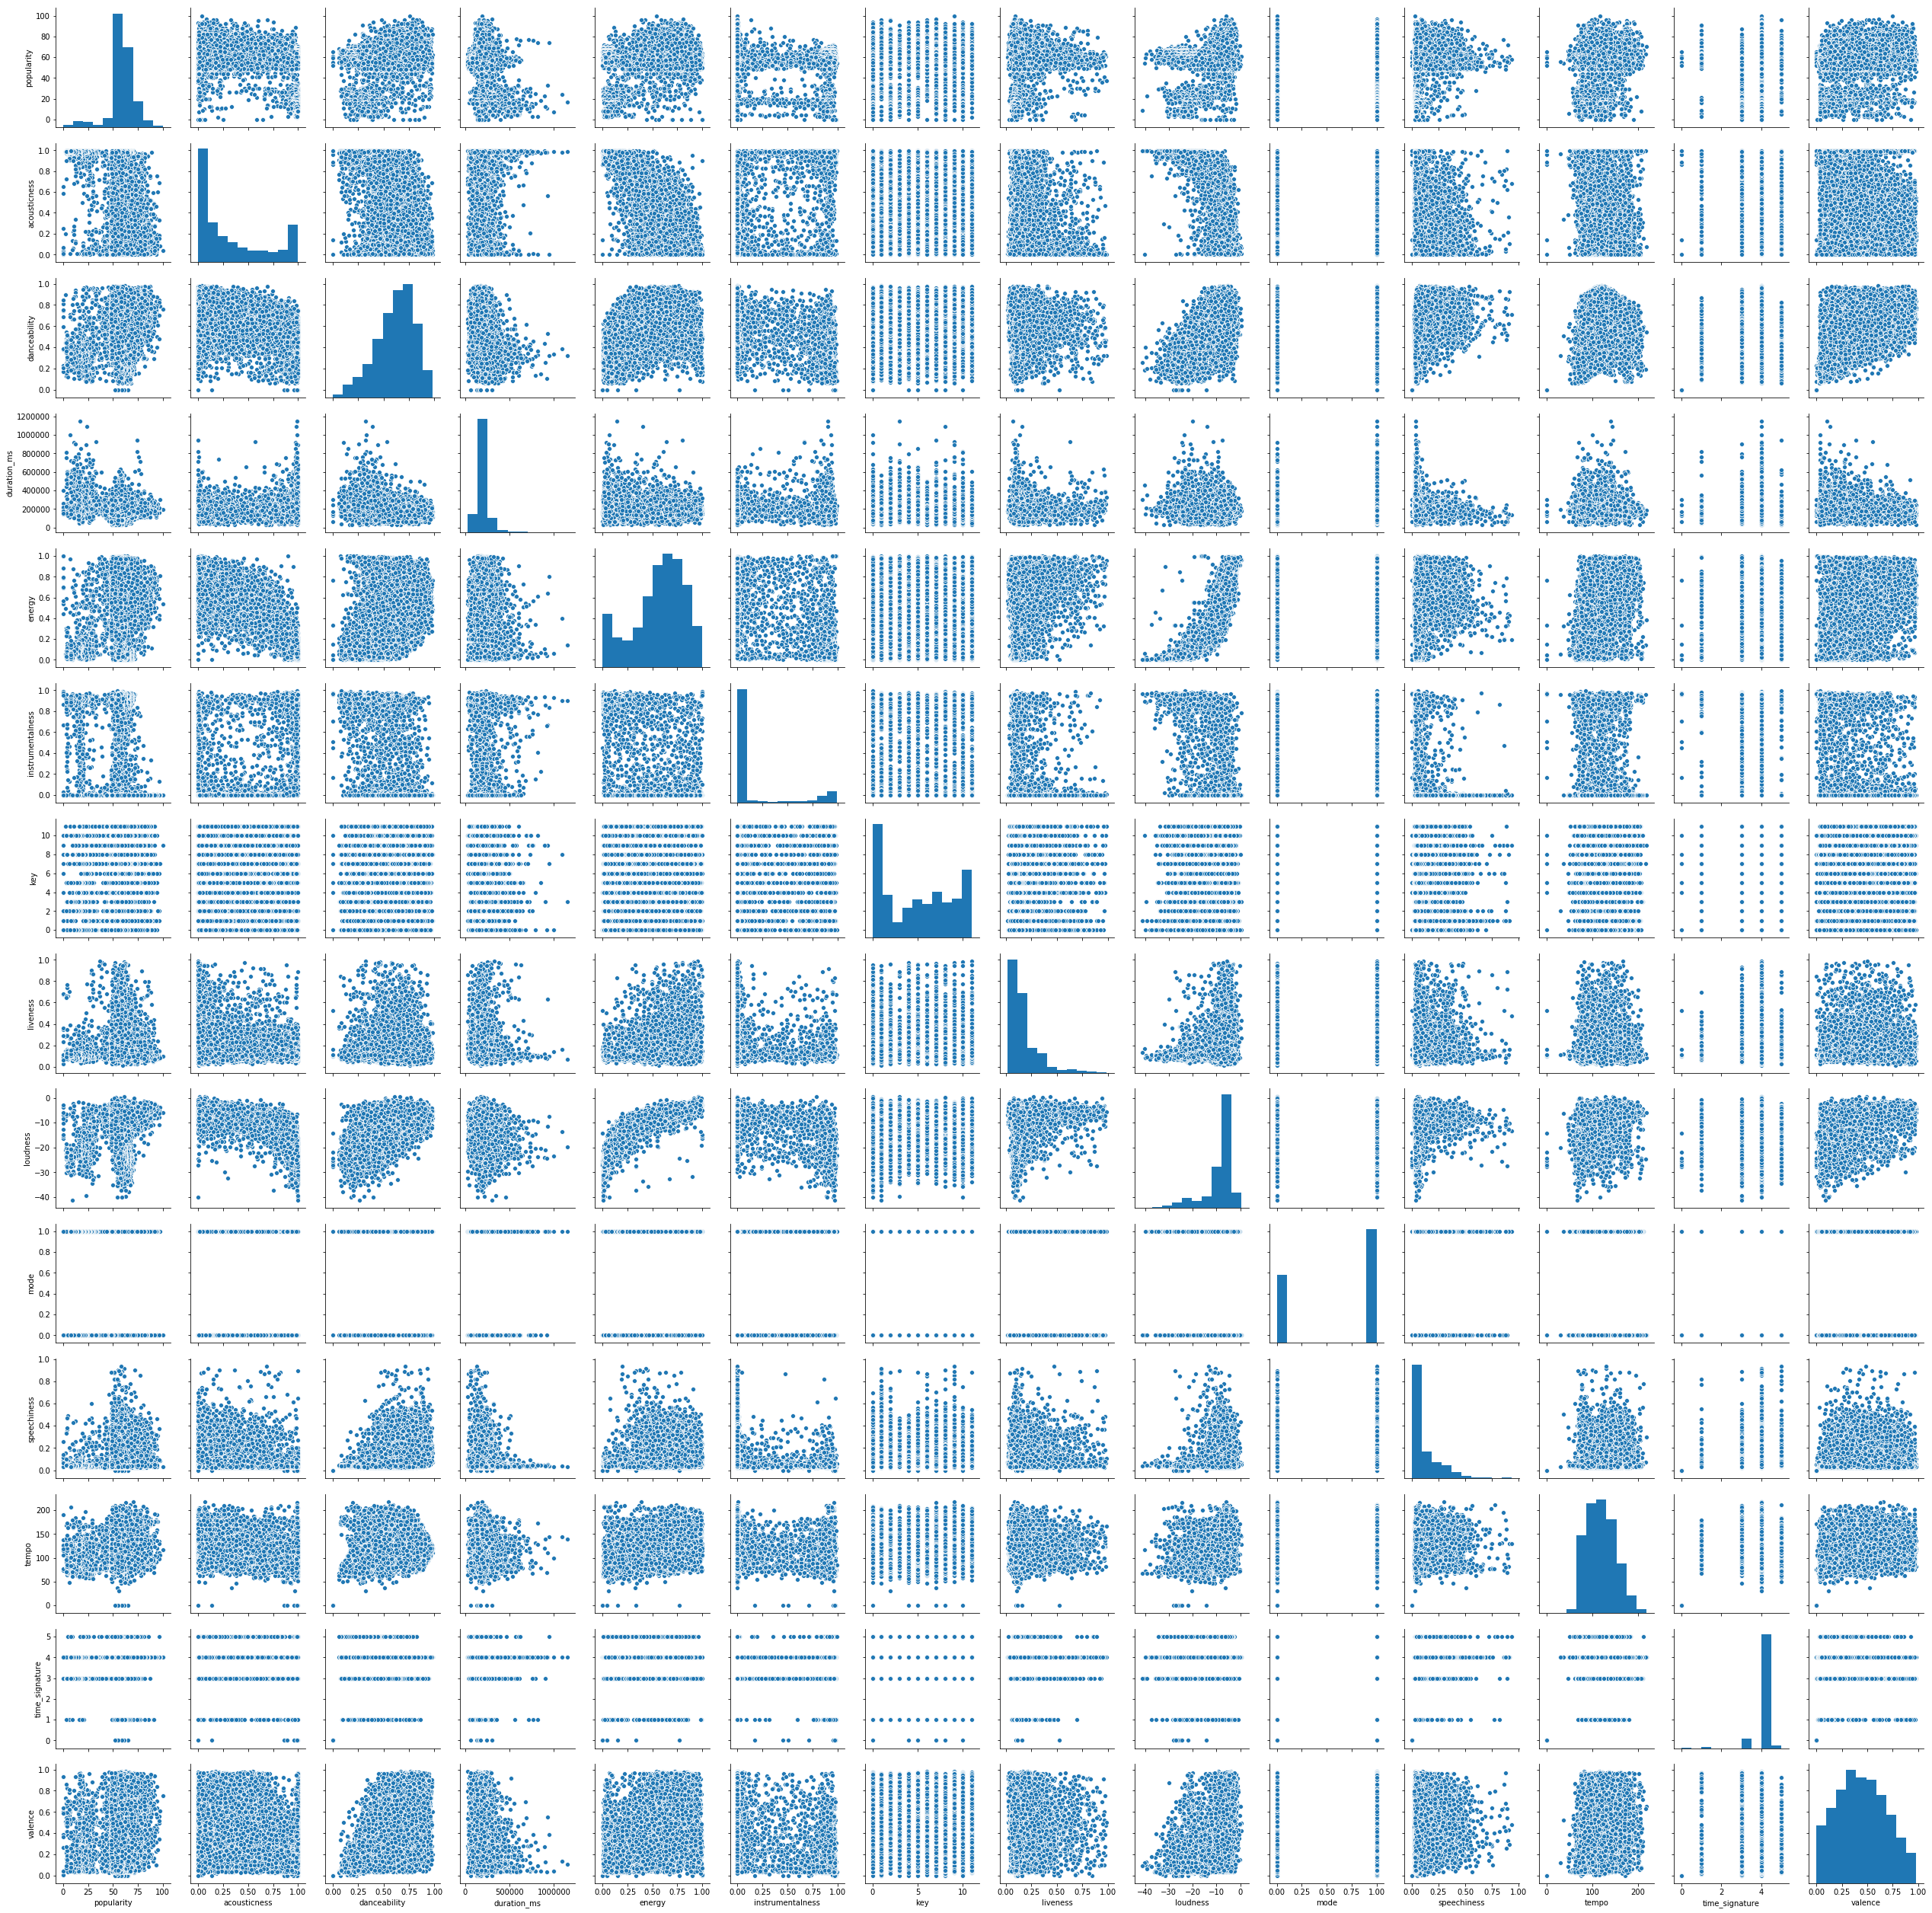

In [62]:
sns.pairplot(df) #pair plot compares all variables to each other

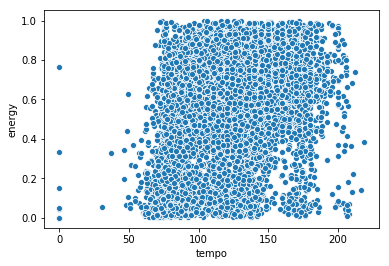

In [70]:
sns.scatterplot(data = df, y = 'energy', x = 'tempo') #scatterplot of energy vs tempo